In [2]:
%load_ext autoreload
%autoreload 2
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/pm4py-dcr/')
print(os.getcwd())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/vco/Projects/pm4py-dcr
/home/vco/Projects/pm4py-dcr


In [3]:
from pm4py.objects.dcr.importer import importer as dcr_importer
from pm4py.objects.dcr.utils.dcr_utils import nested_groups_and_sps_to_flat_dcr
from pm4py.objects.conversion.dcr import converter as dcr_to_tapn
from pm4py.vis import view_petri_net
from pm4py.objects.dcr.obj import dcr_template
from pm4py.objects.petri_net.utils import reachability_graph
from pm4py.visualization.transition_system import visualizer as ts_visualizer
from pm4py.objects.petri_net.timed_arc_net import semantics as tapn_semantics
from pm4py.objects.petri_net.inhibitor_reset import semantics as in_semantics
from pm4py.objects.petri_net.utils.petri_utils import remove_arc, remove_transition, remove_place, add_arc_from_to, pre_set, post_set, get_arc_type
from pm4py.objects.petri_net.utils import reduction, murata
from pm4py.objects.petri_net.exporter import exporter as pnml_exporter
from pm4py.objects.petri_net import properties
from copy import deepcopy
from pm4py.objects.petri_net.timed_arc_net import semantics as tapn_semantics, obj as tapn_obj
from pm4py.objects.petri_net.inhibitor_reset import semantics as inhib_semantics
from pm4py.objects.petri_net.utils import petri_utils as pn_utils

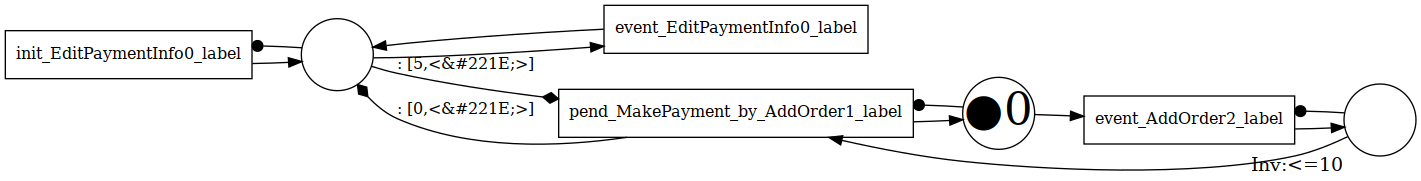

In [19]:
example = 'models/RunningExampleTAPNoriginal.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':False,'labels_as_ids':True})
dcr_dict
net, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True,
                       'postoptimize':True,                                   'map_unexecutable_events':True,
                        'debug':False,'tapn_path':'models/RunningExampleTAPNoriginal.tapn'})
view_petri_net(net,m)

In [15]:
example = 'models/rail_example.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
nested_groups_and_sps_to_flat_dcr(dcr_dict)
dcr_dict = dcr_dict.obj_to_template()
tapn, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True, 'postoptimize':True, 'map_unexecutable_events':False, 'debug':False,'tapn_path':'models/rail_example.tapn'})

[i] preoptimizing
[i] finding exceptional behaviour
[i] mapping events
[i] map constraining relations
[i] map effect relations
[i] handle all relation exceptions
[i] post optimizing
[i] export to models/rail_example.tapn


In [5]:
example = 'models/rail_example_simpler.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':True,'labels_as_ids':True})
nested_groups_and_sps_to_flat_dcr(dcr_dict)
dcr_dict = dcr_dict.obj_to_template()
tapn, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True, 'postoptimize':True, 'map_unexecutable_events':False, 'debug':False,'tapn_path':'models/rail_example_simpler.tapn'})

# Irrelevant for now

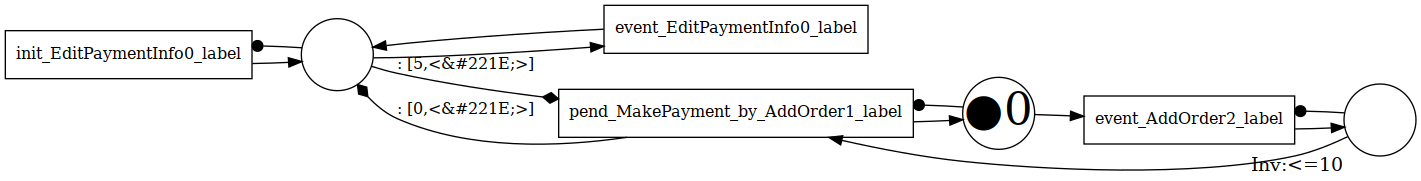

In [20]:
net2, m2, _ = murata.apply_reduction(net,m,set())
view_petri_net(net2,m2)

In [23]:
print(f'P: {len(net.places)} T: {len(net.transitions)} A: {len(net.arcs)}')
print(f'P: {len(net2.places)} T: {len(net2.transitions)} A: {len(net2.arcs)}')

P: 3 T: 4 A: 12
P: 3 T: 4 A: 12


In [122]:
pnml_exporter.apply(net2,m2,'models/murata_net_example.tapn',variant=pnml_exporter.TAPN)

In [3]:
example = 'models/test4.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':False,'labels_as_ids':True})
# dcr_dict = nested_groups_and_sps_to_flat_dcr(dcr_dict)
tapn, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_INHIBITOR_NET, parameters={'preoptimize':True,
               'postoptimize':True,                                                                                  'map_unexecutable_events':False,
                'debug':True, 'tapn_path':'models/test4_untimed.tapn'})

OSError: Error reading file 'models/test4.xml': failed to load external entity "models/test4.xml"

In [123]:
trans_sys = reachability_graph.construct_reachability_graph(tapn, m, use_trans_name=True,
parameters={'petri_semantics': tapn_semantics.TimedArcSemantics()})

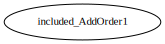

In [124]:
ts_visualizer.apply(trans_sys)

In [10]:
example = 'models/test4.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':False,'labels_as_ids':True})
# nested_groups_and_sps_to_flat_dcr(rail_dcr_labeled)
# dcr_dict = rail_dcr_labeled.obj_to_template()
tapn, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True, 'postoptimize':True, 'map_unexecutable_events':False, 'debug':True,'tapn_path':'models/test4.tapn'})

[i] preoptimizing
[i] finding exceptional behaviour
[i] mapping events
[i] map constraining relations
[i] map effect relations
[i] handle all relation exceptions
[i] post optimizing
[i] export to models/test4.tapn


In [10]:
import os
print(os.getcwd())
os.chdir('/home/vco/Projects/pm4py-dcr/')
print(os.getcwd())
from pm4py.objects.dcr.importer import importer as dcr_importer
from pm4py.objects.conversion.dcr import converter as dcr_to_tapn
example = 'models/test4.xml'
dcr_dict = dcr_importer.apply(example,parameters={'as_dcr_object':False,'labels_as_ids':True})
# nested_groups_and_sps_to_flat_dcr(rail_dcr_labeled)
# dcr_dict = rail_dcr_labeled.obj_to_template()
tapn, m = dcr_to_tapn.apply(dcr_dict,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True, 'postoptimize':True, 'map_unexecutable_events':False, 'debug':True,'tapn_path':'models/test4.tapn'})

[i] preoptimizing
[i] finding exceptional behaviour
[i] mapping events
[i] map constraining relations
[i] map effect relations
[i] handle all relation exceptions
[i] post optimizing
[i] export to models/test4.tapn


In [43]:
tapn = tapn_obj.TimedArcNet()
P0 = tapn.Place('P0',properties={properties.AGE_INVARIANT:10})
P1 = tapn.Place('P1')
T0 = tapn.Transition('T0')
tapn.places.add(P0)
tapn.places.add(P1)
tapn.transitions.add(T0)
a0 = pn_utils.add_arc_from_to(P0,T0,tapn,type=properties.TRANSPORT_ARC)
a1 = pn_utils.add_arc_from_to(T0,P1,tapn,type=properties.TRANSPORT_ARC)
a0.properties[properties.AGE_MIN] = 5
a0.properties[properties.TRANSPORT_INDEX] = 0
a1.properties[properties.TRANSPORT_INDEX] = 0
m = tapn_obj.TimedMarking()
m[P0] = 1
m.timed_dict[P0] = 0

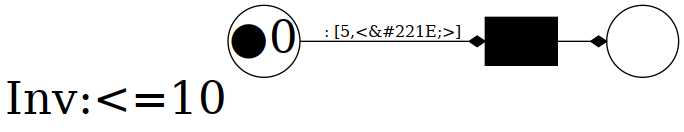

In [44]:
view_petri_net(tapn,m)

In [46]:
m.timed_dict[P0] = 0

In [47]:
m

['P0:1'] {P0: 0}

In [48]:
tapn_semantics.enabled_transitions(tapn,m)

(5, (T0, None))
10


set()

In [49]:
inhib_semantics.enabled_transitions(tapn,m)

{(T0, None)}

In [96]:
test_dcr = deepcopy(dcr_template)
test_dcr['events'] = {'A','B','C'}
test_dcr['includesTo'] = {'A':{'B'}}
test_dcr['conditionsFor'] = {'C': {'A'}}
test_dcr['responseTo'] = {'A':{'B'}}
test_dcr['excludeTo'] = {'A':{'A'},'B':{'B'}}
test_dcr['marking']['included'] = {'A','C'}

tapn, m = dcr_to_tapn.apply(test_dcr,variant=dcr_to_tapn.Variants.TO_TIMED_ARC_PETRI_NET, parameters={'preoptimize':True,
               'postoptimize':True,                                                                                  'map_unexecutable_events':False,
                'debug':False,                                                                       'tapn_path':'models/test.tapn'})